<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-Household-heating-data-on-the-map" data-toc-modified-id="Visualizing-Household-heating-data-on-the-map-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing Household heating data on the map</a></span></li><li><span><a href="#Examples-on-the-map-plotting" data-toc-modified-id="Examples-on-the-map-plotting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples on the map plotting</a></span><ul class="toc-item"><li><span><a href="#The-use-of-Basemap" data-toc-modified-id="The-use-of-Basemap-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The use of Basemap</a></span></li><li><span><a href="#The-use-of-Shapefiles" data-toc-modified-id="The-use-of-Shapefiles-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The use of Shapefiles</a></span></li></ul></li><li><span><a href="#Visualizing-the-house-heating-data" data-toc-modified-id="Visualizing-the-house-heating-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing the house heating data</a></span><ul class="toc-item"><li><span><a href="#Explore-Household-heating-data-as-follows:" data-toc-modified-id="Explore-Household-heating-data-as-follows:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Explore Household heating data as follows:</a></span></li><li><span><a href="#Take-the-original-Household-heating-data-('Household-heating-by-Congressional-District---2008.csv')-and-wrangle-the-data-into-a-state-format." data-toc-modified-id="Take-the-original-Household-heating-data-('Household-heating-by-Congressional-District---2008.csv')-and-wrangle-the-data-into-a-state-format.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Take the original Household heating data ('Household heating by Congressional District - 2008.csv') and wrangle the data into a state format.</a></span></li><li><span><a href="#Plot-the-avergae&quot;Housing-Units-That-Are-Mobile-Homes&quot;-for-each-state." data-toc-modified-id="Plot-the-avergae&quot;Housing-Units-That-Are-Mobile-Homes&quot;-for-each-state.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot the avergae"Housing Units That Are Mobile Homes" for each state.</a></span></li><li><span><a href="#Now-load-the-map" data-toc-modified-id="Now-load-the-map-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Now load the map</a></span><ul class="toc-item"><li><span><a href="#How-many-states-in-your-data-(S3)?-Does-the-number-of-states-match-with-shapefiles-(S2)?" data-toc-modified-id="How-many-states-in-your-data-(S3)?-Does-the-number-of-states-match-with-shapefiles-(S2)?-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>How many states in your data (S3)? Does the number of states match with shapefiles (S2)?</a></span></li><li><span><a href="#Assign-color-for-each-range:-Using-color-map" data-toc-modified-id="Assign-color-for-each-range:-Using-color-map-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Assign color for each range: Using color map</a></span></li></ul></li></ul></li></ul></div>

# Data Integration with Household heating data

##  Visualizing Household heating data on the map

Our aim in this note is to visualize the household heating data for each state in USA on a map. We will discuss how to integrate between three different data sources: 
* a basic map of USA (S1), 
* shapefiles of States (S2), 
* and hourse heating data for those regions (S3). 

S3 presents household heating by congressional district. Now, our task is to merge the three data set together and generate a map. 

We start first with setting up the environment. 

You will need to install the following Python libraries
* basemap: conda install basemap
* shapefile: pip install pyshp

In general, there are a couple of simple options for plotting data on maps, i.e., using latitude and longitude. However, if you want to plot on a country you may have to go for the middle or find an actual location
(e.g. Austin, Texas, USA rather than just USA). There's also a nice example here:
http://introtopython.org/visualization_earthquakes.html. Instead of using the coordinate values, we can use
shapefiles that often come as a set, the minimum is .dbf, shp & .shx

## Examples on the map plotting

### The use of Basemap

The materials in this section are partially based on those from http://vizclass.csc.ncsu.edu/2011/09/tutorial-geographic-data-on-map-with.html.

In [1]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np  
%matplotlib inline

Let's start with a world map by drawing the countries and the coasts.

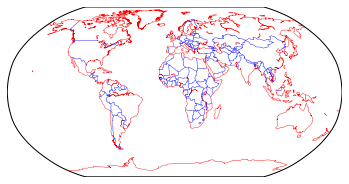

In [2]:
# lon_0 is central longitude of robinson projection. 
# resolution = 'c' means use crude resolution coastlines. 
m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
# draw coastlines, country boundaries, fill continents. 
m.drawcoastlines(color = 'red', linewidth = .4) 
m.drawcountries(color = 'blue', linewidth = .4)

Now, we can further add some color to the map. For example, we can change the background color to light blue so that it indicates the ocean.

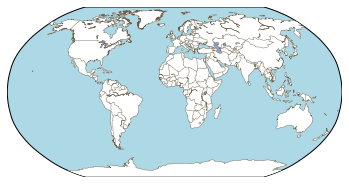

In [3]:
# set a background colour = water
# m.drawmapboundary(fill_color='#85A6D9') # using codes or just names:
m.drawmapboundary(fill_color='lightblue')
# draw coastlines, country boundaries, fill continents. 
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)

We can also draws the lines of longitude and latitude.

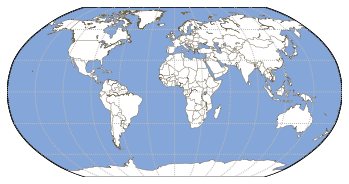

In [4]:
# draw lat/lon grid lines every 30 degrees. 
m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)

Now, assume that we are going to draw a map showing the population information of the cities that are given by their coordinates as follows.
```python
lats = [35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2] 
lngs = [139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5] 
populations = [32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65] #millions
```

The size of the circle is proportional to the population. If the population is less than 19 million, we will use color blue. There are two ways to do this task. One is as follows:

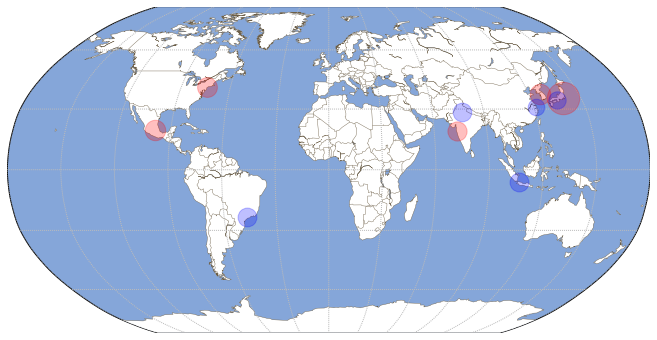

In [5]:
def get_marker_color(population):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if population < 19:
        return ('bo')
    else:
        return ('ro')

plt.figure(figsize = (12,6)) # make it bigger first

m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')
lats = [35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2] 
lngs = [139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5] 
populations = [32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65] #millions

for lng, lat, s in zip(lngs, lats, populations):
    x,y = m(lng, lat)
    colour = get_marker_color(s)
    m.plot(x, y, colour, markersize= s, alpha = 0.25 )
 
plt.show()

The other is

/var/folders/4n/y3z900hx7yj7qq3g3q2t8y7m0000gn/T/ipykernel_42577/4201346264.py:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  color = pd.np.where(df_3['populations'] < 19,'blue','red'),


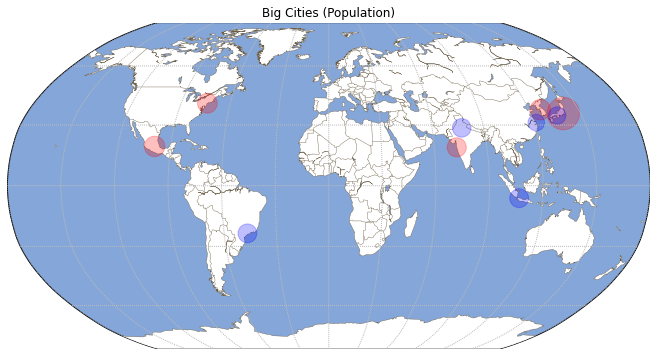

In [6]:
import pandas as pd
plt.figure(figsize = (12,6)) # make it bigger first

m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')

df_3 = pd.DataFrame({'lats':[35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2],
                     'lngs':[139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5],
                     'populations':[32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65]},
                    columns=['lats','lngs','populations']
                   )

x,y = m(df_3.lngs.values,df_3.lats.values)

m.scatter(x, y,
          s = df_3['populations'].apply(lambda x: x*x),
          marker = 'o', # symbol 
          color = pd.np.where(df_3['populations'] < 19,'blue','red'),
          alpha = 0.25, # transparency 
          zorder = 2, # plotting order 
         )
plt.title('Big Cities (Population)') 
plt.show()

### The use of Shapefiles
Based on http://stackoverflow.com/questions/15968762/shapefile-and-matplotlib-plot-polygon-collection-of-shapefile-coordinates

In [7]:
import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

The Shapefile format is a popular Geographic Information System vector data format created by Esri. For more information about this format please read the well-written “ESRI Shapefile Technical Description - July 1998” located at http://www.esri.com/library/whitepapers/pdfs/shapefile.pdf.Essentially, Shapefiles encode points, lines, curves, and polygons. This is useful for mapping applications where you need to represent county lines, major highways, lakes, etc. 

In [11]:
sf = shapefile.Reader("data/world_countries_boundary_file_world_2002") # note, no suffix, all 3 files are used
recs = sf.records()
shapes = sf.shapes()
recs[:10]

[Record #0: ['Afghanistan', 'AFG', 'AF', 65209, 'Afghanistan', 25067407, 'Asia', 'AFG', 'Afghanistan'],
 Record #1: ['Albania', 'ALB', 'AL', 2740, 'Albania', 3153731, 'Europe', 'ALB', 'Albania'],
 Record #2: ['Algeria', 'DZA', 'DZ', 238174, 'Algeria', 32854159, 'NorthAfrica', 'DZA', 'Algeria'],
 Record #3: ['Andorra', 'AND', 'AD', 0, 'Andorra', 73483, 'Europe', 'AND', 'Andorra'],
 Record #4: ['Angola', 'AGO', 'AO', 124670, 'Angola', 16095214, 'Sub Saharan Africa', 'AGO', 'Angola'],
 Record #5: ['Antarctica', 'AQ', 'ATA', 0, 'Antarctica', 0, 'Antarctica', 'ATA', 'Antarctica'],
 Record #6: ['Antigua and Barbuda', 'ATG', 'AG', 44, 'Antigua and Barbuda', 83039, 'Caribbean', 'ATG', 'Antigua and Barbuda'],
 Record #7: ['Argentina', 'ARG', 'AR', 273669, 'Argentina', 38747148, 'Latin America', 'ARG', 'Argentina'],
 Record #8: ['Armenia', 'ARM', 'AM', 2820, 'Armenia', 3017661, 'Asia', 'ARM', 'Armenia'],
 Record #9: ['Australia', 'AUS', 'AU', 768230, 'Australia', 20310208, 'Australia', 'AUS', 'A

This is a list of the country name & country code (ISO) in two different formats, in alphabetical order. Then, how many records (countries) are there?

In [12]:
len(recs), len(shapes)

(211, 211)

Now, we are going to draw the world map, where each country is highlighted with a different color, and we would like to have USA marked as black and AUS as pink.

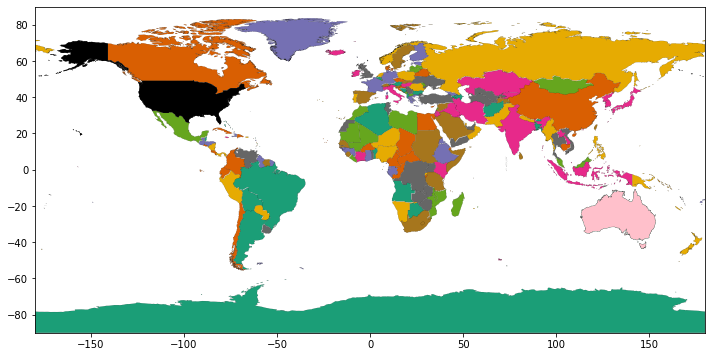

In [13]:
cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*numpy.arange(Nshp)/Nshp) # one colour for every contry...
# plot
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

#Plot each country
for nshp in range(Nshp): # change range to xrange if you use Python 2
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    for pij in range(len(prt)): # change range to xrange if you use Python 2
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))
    # hack the colour for specific countries, actually alphabetical, need to know ISO code
    if recs[nshp][1] == "USA":
         ax.add_collection(PatchCollection(ptchs,facecolor=[0,0,0,1],edgecolor='k', linewidths=.1))  # black
    if recs[nshp][1] == "AUS":
         ax.add_collection(PatchCollection(ptchs,facecolor = "pink",edgecolor='k', linewidths=.1))  # pink
ax.set_xlim(-180,+180)
ax.set_ylim(-90,90)

plt.show()

## Visualizing the house heating data
There are three shape files provided. Let's have a look on one of them!

In [16]:
# You can look at the shapefile data, just display the contents as is, at the moment 
# !cat 'gz_2010_us_040_00_500k.dbf' 
inFile = open('data/gz_2010_us_040_00_500k_1.dbf' , 'r')
#Use the following line if you use Python 2
#inFile = open('data/gz_2010_us_040_00_500k.dbf' , 'r')
data = inFile.readlines()
inFile.close()
data

['0400000US23                                                 23Maine                                                                                                      30842.923000000000000 0400000US25                                                 25Massachusetts                                                                                               7800.058000000000000 0400000US26                                                 26Michigan                                                                                                   56538.901000000000000 0400000US30                                                 30Montana                                                                                                   145545.801000000000000 0400000US32                                                 32Nevada                                                                                                    109781.180000000000000 0400000US34                                

### Explore Household heating data as follows:

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/Household heating by Congressional District - 2008.csv')
df.head()

,Congressional District,Two-Digit District,Average Household Size,% Housing Units That Are Mobile Homes,% Housing Units Built in 2005 or Later,% Housing Units Built in 1939 or Earlier,% Homes Heated Principally With Gas,% Homes Heated Principally With Electricity,"% Homes Heated Principally with Fuel Oil, Kerosene, Etc."
0,Alabama 1,AL-01,2.49,11.9,4.5,4.5,37,62.1,0.1
1,Alabama 2,AL-02,2.52,17.0,3.9,6.2,34.1,64.6,0.2
2,Alabama 3,AL-03,2.42,18.6,5.3,7.4,41,56.3,0.3
3,Alabama 4,AL-04,2.54,19.9,2.6,7.2,39.4,57.3,0.7
4,Alabama 5,AL-05,2.47,10.4,5.9,4.8,33.9,64.3,0.6


**Schema Conflict: Different level of aggregation:**

* The shappefiles (S2) are categorised by state, whereas S3 is represented by district. Therefore, we will need schema matching to integrate between both.

* Also that the Congressional District attribute contains the following values:
    * Alabama 1
    * Alabama 2
etc.


However, we want 'state' names instead of 'district' to be able to visualise data for each state on map. Thus, we can do the following:

* Change the shape files so the regions match the data. 

* Find files that already match (e.g. Google Fusion Tables)

* Change the data to match the shape regions

### Take the original Household heating data ('Household heating by Congressional District - 2008.csv') and wrangle the data into a state format. 

Create your own CSV file contains state information. You should have a dataset that looks something like this:

<img src="image/States.png">

Now, load your new CSV file:

In [18]:
df['States']=df['Congressional District'].str.extract(r'(.*) [(\d)(At)]', expand=False).str.strip()
print (df.States.value_counts())
df[df.States.isnull()]

California        53
Texas             32
New York          29
Florida           25
Pennsylvania      19
Illinois          19
Ohio              18
Michigan          15
New Jersey        13
North Carolina    13
Georgia           13
Virginia          11
Massachusetts     10
Indiana            9
Washington         9
Tennessee          9
Missouri           9
Wisconsin          8
Arizona            8
Maryland           8
Minnesota          8
Alabama            7
Colorado           7
Louisiana          7
South Carolina     6
Kentucky           6
Iowa               5
Connecticut        5
Oregon             5
Oklahoma           5
Mississippi        4
Arkansas           4
Kansas             4
Utah               3
New Mexico         3
Nevada             3
Nebraska           3
West Virginia      3
Idaho              2
New Hampshire      2
Hawaii             2
Rhode Island       2
Maine              2
Vermont            1
Montana            1
South Dakota       1
North Dakota       1
Alaska       

,Congressional District,Two-Digit District,Average Household Size,% Housing Units That Are Mobile Homes,% Housing Units Built in 2005 or Later,% Housing Units Built in 1939 or Earlier,% Homes Heated Principally With Gas,% Homes Heated Principally With Electricity,"% Homes Heated Principally with Fuel Oil, Kerosene, Etc.",States
86,District of Columbia,NaN,2.23,0.0,2.4,34.0,64.6,30.1,3.9,NaN


In [19]:
df['State']=df['Two-Digit District'].str.extract(r'(.*)-')
print (df.State.value_counts())
df[df.State.isnull()]

CA    53
TX    32
NY    29
FL    25
PA    19
IL    19
OH    18
MI    15
NJ    13
NC    13
GA    13
VA    11
MA    10
IN     9
WA     9
TN     9
MO     9
WI     8
AZ     8
MD     8
MN     8
AL     7
CO     7
LA     7
SC     6
KY     6
IA     5
CT     5
OR     5
OK     5
MS     4
AR     4
KS     4
UT     3
NM     3
NV     3
NE     3
WV     3
ID     2
NH     2
HI     2
RI     2
ME     2
VT     1
MT     1
SD     1
ND     1
AK     1
DE     1
WY     1
Name: State, dtype: int64


,Congressional District,Two-Digit District,Average Household Size,% Housing Units That Are Mobile Homes,% Housing Units Built in 2005 or Later,% Housing Units Built in 1939 or Earlier,% Homes Heated Principally With Gas,% Homes Heated Principally With Electricity,"% Homes Heated Principally with Fuel Oil, Kerosene, Etc.",States,State
86,District of Columbia,NaN,2.23,0.0,2.4,34.0,64.6,30.1,3.9,NaN,NaN


In [20]:
df[df.States.isnull()]

,Congressional District,Two-Digit District,Average Household Size,% Housing Units That Are Mobile Homes,% Housing Units Built in 2005 or Later,% Housing Units Built in 1939 or Earlier,% Homes Heated Principally With Gas,% Homes Heated Principally With Electricity,"% Homes Heated Principally with Fuel Oil, Kerosene, Etc.",States,State
86,District of Columbia,NaN,2.23,0.0,2.4,34.0,64.6,30.1,3.9,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Congressional District                                    436 non-null    object 
 1   Two-Digit District                                        435 non-null    object 
 2   Average Household Size                                    436 non-null    float64
 3   % Housing Units That Are Mobile Homes                     436 non-null    float64
 4   % Housing Units Built in 2005 or Later                    436 non-null    float64
 5   % Housing Units Built in 1939 or Earlier                  436 non-null    float64
 6   % Homes Heated Principally With Gas                       436 non-null    object 
 7   % Homes Heated Principally With Electricity               436 non-null    object 
 8   % Homes Heated Princ

### Plot the avergae"Housing Units That Are Mobile Homes" for each state. 

List the average value for each state. We will use the average values to generate the color codes

In [22]:
state = df.groupby('States')
statedf = state.aggregate(np.average)
avergeValue = dict(statedf['% Housing Units That Are Mobile Homes'])
avergeValue

/Users/jiayingwu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


{'Alabama': 14.371428571428575,
 'Alaska': 4.6,
 'Arizona': 10.375,
 'Arkansas': 12.425,
 'California': 3.692452830188679,
 'Colorado': 4.528571428571428,
 'Connecticut': 0.74,
 'Delaware': 10.2,
 'Florida': 9.328,
 'Georgia': 9.96923076923077,
 'Hawaii': 0.15,
 'Idaho': 9.25,
 'Illinois': 2.521052631578947,
 'Indiana': 5.544444444444444,
 'Iowa': 4.159999999999999,
 'Kansas': 5.225,
 'Kentucky': 12.700000000000001,
 'Louisiana': 12.842857142857142,
 'Maine': 9.05,
 'Maryland': 1.6,
 'Massachusetts': 0.85,
 'Michigan': 5.4,
 'Minnesota': 3.45,
 'Mississippi': 15.075,
 'Missouri': 6.566666666666667,
 'Montana': 11.8,
 'Nebraska': 3.8000000000000003,
 'Nevada': 6.133333333333334,
 'New Hampshire': 5.95,
 'New Jersey': 0.9307692307692309,
 'New Mexico': 16.53333333333333,
 'New York': 2.2931034482758617,
 'North Carolina': 14.35384615384615,
 'North Dakota': 7.0,
 'Ohio': 4.016666666666667,
 'Oklahoma': 9.0,
 'Oregon': 8.48,
 'Pennsylvania': 4.194736842105264,
 'Rhode Island': 1.05,
 'Sou

In [23]:
avergeValue['Virginia']

5.7

### Now load the map 

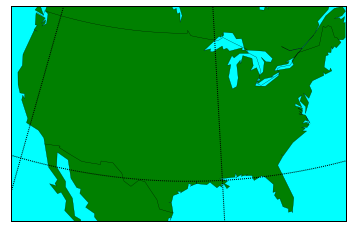

In [24]:
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')

from matplotlib.collections import LineCollection
from matplotlib.colors import rgb2hex

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,
            urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33,lat_2=45,lon_0=-95)

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
m.fillcontinents(color='green',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
m.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

plt.show()

#### How many states in your data (S3)? Does the number of states match with shapefiles (S2)?

Is there something we need to fix before we plot information?

In [25]:
shp_info = m.readshapefile('data/gz_2010_us_040_00_500k','states',drawbounds=False)
statenames=[]
for shapedict in m.states_info:
    statename = shapedict['NAME']
    try:
        av = avergeValue[statename]
    except KeyError:
        print (statename) 
    statenames.append(statename)

np.unique(statenames)

Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
Puerto Rico
District of Columbia


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype='<U20')

In [26]:
len(np.unique(statenames))

52

However, number of states does not match (should be 50 not 52)?

'District of Columbia' is listed as a state while it is not. 

and 'Puerto Rico'?? (some sort of dependency)

(not on the map anyway, neither is Alaska but Python can handle it)

#### Assign color for each range: Using color map 
We can now cycle through states, color each one.


In [27]:
import matplotlib.pyplot as plt

colors={}
vmin = 0; vmax = 20 # set range.
cmap = plt.cm.BrBG
for s in statenames:
    if s != 'District of Columbia' and \
       s != "Puerto Rico":
        colors[s] = cmap((avergeValue[s]- vmin)/(vmax-vmin))[:3]
    ## Try to color Alabama with black 
    if s=='Alabama':
        colors[s]=(0,0,0)

colors

{'Maine': (0.9627066512879662, 0.9357939254133025, 0.8646674356016917),
 'Massachusetts': (0.41553248750480587,
  0.23898500576701268,
  0.027297193387158785),
 'Michigan': (0.8376009227220299, 0.6858131487889272, 0.39792387543252583),
 'Montana': (0.7945405613225685, 0.9210303729334871, 0.9029603998462131),
 'Nevada': (0.8798154555940023, 0.7695501730103805, 0.5063437139561705),
 'New Jersey': (0.4241445597846982, 0.24405997693194925, 0.02806612841214917),
 'New York': (0.5764705882352942, 0.34348327566320647, 0.05805459438677432),
 'North Carolina': (0.45005767012687453,
  0.7665513264129183,
  0.7222606689734719),
 'Ohio': (0.7490196078431373, 0.5058823529411764, 0.17647058823529413),
 'Pennsylvania': (0.7588619761630142, 0.5258746635909265, 0.20107650903498644),
 'Rhode Island': (0.4413687043444829,
  0.25420991926182235,
  0.02960399846212995),
 'Tennessee': (0.9501730103806229, 0.958246828143022, 0.9570934256055363),
 'Texas': (0.9399461745482507, 0.8688965782391388, 0.6893502499

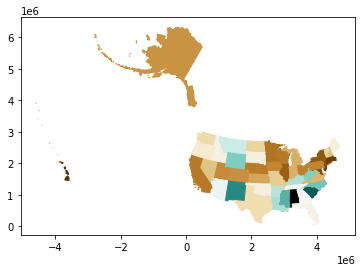

In [28]:
for nshape,seg in enumerate(m.states):
    xx,yy = zip(*seg)
    if statenames[nshape] != 'District of Columbia' and \
        statenames[nshape] != "Puerto Rico":
        color = rgb2hex(colors[statenames[nshape]]) 
        plt.fill(xx,yy,color,edgecolor=color)

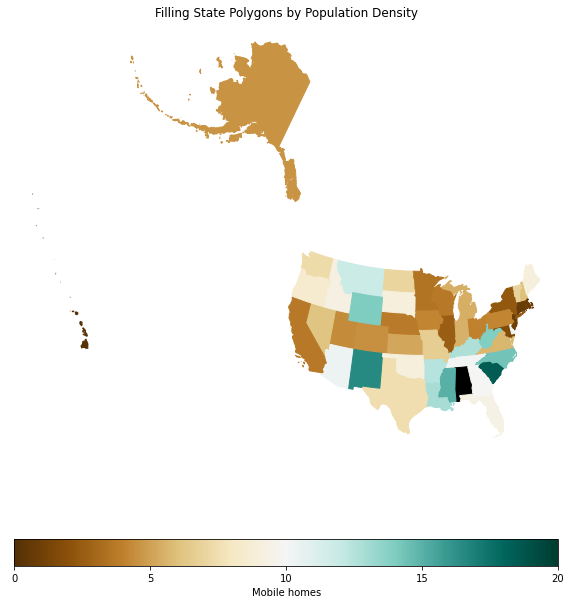

In [29]:
plt.figure(figsize=(10,10))

for nshape,seg in enumerate(m.states):
    xx,yy = zip(*seg)
    if statenames[nshape] != 'District of Columbia' and \
        statenames[nshape] != "Puerto Rico":
        color = rgb2hex(colors[statenames[nshape]]) 
        plt.fill(xx,yy,color,edgecolor=color)

# # draw meridians and parallels.
# m.drawparallels(np.arange(25,65,20), labels=[0,0,0,0], zorder=-1,color="w")
# m.drawmeridians(np.arange(-120,-40,20), labels=[0,0,0,0], zorder=-1,color="w")

# set up colorbar:
mm = plt.cm.ScalarMappable(cmap=cmap)
mm.set_array([0,20]) # Replace this with Min and Max values in your data



plt.colorbar(mm, label="Mobile homes",
             ticks=[0,5,10,15,20],# Replace this with your ranges 
             orientation="horizontal", fraction=0.05,
            )

plt.title('Filling State Polygons by Population Density')
plt.gca().axis("off")



plt.show()